<a href="https://colab.research.google.com/github/Sanjeev-gour/Honors-Software-Development-assessment-1/blob/main/DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  drive  face-mask-dataset.zip  kaggle.json  sample_data


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1138.jpg', 'with_mask_3146.jpg', 'with_mask_1938.jpg', 'with_mask_2957.jpg', 'with_mask_3149.jpg']
['with_mask_1809.jpg', 'with_mask_2485.jpg', 'with_mask_3068.jpg', 'with_mask_614.jpg', 'with_mask_17.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3455.jpg', 'without_mask_968.jpg', 'without_mask_3588.jpg', 'without_mask_377.jpg', 'without_mask_3291.jpg']
['without_mask_44.jpg', 'without_mask_1539.jpg', 'without_mask_3404.jpg', 'without_mask_2471.jpg', 'without_mask_1137.jpg']


In [ ]:
print('Number of Masked Images:', len(with_mask_files))
print('Number of Without Masked Images:', len(without_mask_files))

Number of Masked Images: 3725
Number of Without Masked Images: 3828


Creating Labels for the two class of Images

With mask --> 1

Without Mask --> 0

In [ ]:
#create labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))

print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

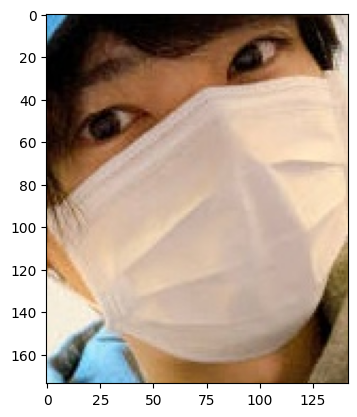

In [ ]:
# display with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_124.jpg')
imgplot = plt.imshow(img)
plt.show()

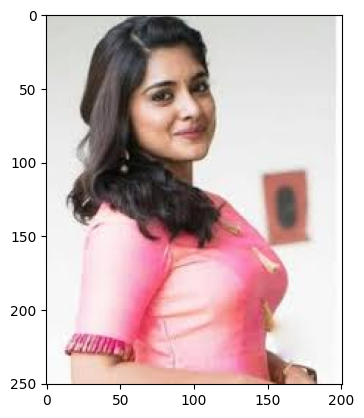

In [ ]:
# display without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1766.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the images

Convert the images to numpy arrays

In [ ]:
#convert images to numpy array

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[  4,   3,   8],
        [  3,   2,   8],
        [  2,   1,   6],
        ...,
        [  9,   5,   2],
        [  7,   6,   2],
        [  7,   6,   2]],

       [[  4,   3,   8],
        [  4,   2,   8],
        [  3,   1,   6],
        ...,
        [  9,   6,   2],
        [  8,   7,   3],
        [  8,   7,   3]],

       [[  5,   3,   8],
        [  5,   3,   7],
        [  4,   2,   5],
        ...,
        [ 10,   7,   3],
        [  9,   8,   4],
        [  9,   8,   4]],

       ...,

       [[253, 198, 159],
        [253, 199, 160],
        [254, 201, 161],
        ...,
        [247, 184, 135],
        [250, 185, 135],
        [252, 185, 135]],

       [[254, 200, 158],
        [254, 200, 158],
        [255, 201, 159],
        ...,
        [247, 184, 135],
        [250, 185, 135],
        [252, 185, 135]],

       [[255, 201, 158],
        [255, 201, 158],
        [255, 202, 158],
        ...,
        [246, 183, 134],
        [250, 185, 135],
        [252, 185, 135]]], dtype=uint8)
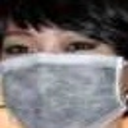

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image list and label to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)

(7553, 128, 128, 3)


In [ ]:
print(Y.shape)

(7553,)


Train test split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scalling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.9254902 , 0.90980392, 0.89803922],
        [0.9254902 , 0.90980392, 0.89803922],
        [0.9254902 , 0.90980392, 0.89803922],
        ...,
        [0.29019608, 0.47058824, 0.36470588],
        [0.3254902 , 0.49803922, 0.39215686],
        [0.33333333, 0.50980392, 0.39607843]],

       [[0.92156863, 0.90588235, 0.89803922],
        [0.92156863, 0.90588235, 0.89803922],
        [0.92156863, 0.90588235, 0.89803922],
        ...,
        [0.3254902 , 0.50196078, 0.4       ],
        [0.34509804, 0.52156863, 0.40784314],
        [0.32156863, 0.49803922, 0.38431373]],

       [[0.93333333, 0.91764706, 0.91372549],
        [0.93333333, 0.91764706, 0.91372549],
        [0.93333333, 0.91764706, 0.91372549],
        ...,
        [0.31764706, 0.49803922, 0.38823529],
        [0.27843137, 0.45490196, 0.3372549 ],
        [0.27843137, 0.45098039, 0.32941176]],

       ...,

       [[0.74117647, 0.74509804, 0.85882353],
        [0.77254902, 0.78039216, 0.89019608],
        [0.75294118, 0

Building a Convolutional Neural Network(CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the neural network

model.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#training the neural network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - acc: 0.6635 - loss: 0.7226 - val_acc: 0.8694 - val_loss: 0.3302
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8749 - loss: 0.3306 - val_acc: 0.8826 - val_loss: 0.3000
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9063 - loss: 0.2392 - val_acc: 0.8992 - val_loss: 0.2641
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9199 - loss: 0.2172 - val_acc: 0.9008 - val_loss: 0.2727
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9354 - loss: 0.1650 - val_acc: 0.8992 - val_loss: 0.2439
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9361 - loss: 0.1534 - val_acc: 0.9140 - val_loss: 0.2788
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9539 - loss: 0.1218 - val_acc: 0.9190 - val_loss: 0.2970
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9612 - loss: 0.1019 - val_acc: 0.9124 - val_loss: 0.2706
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16m

Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9174 - loss: 0.2810
Test Accuracy= 0.9232296347618103


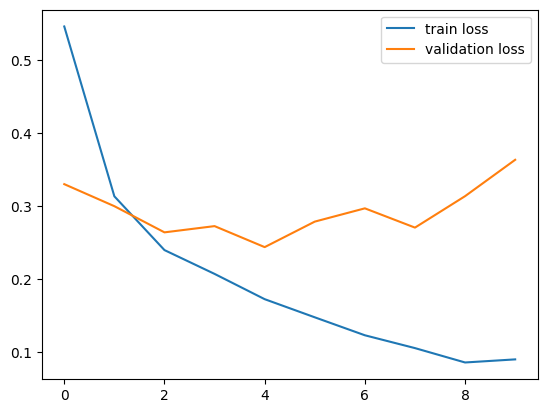

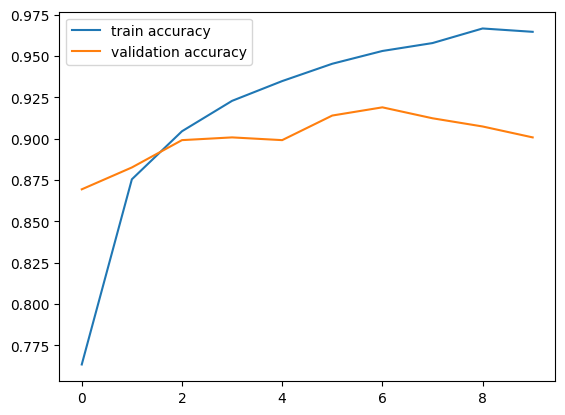

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/data/without_mask/without_mask_1007.jpg


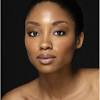

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.47899747 0.4551212 ]]
0
The person in the Image is not wearing a Mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the Image is wearing a Mask')

else:
  print('The person in the Image is not wearing a Mask')

## Making it real time